In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix

In [2]:
df_train = pd.read_csv("Datasets/Health_Insurance/train.csv")
df_test = pd.read_csv("Datasets/Health_Insurance/test.csv")

In [3]:
print(f"The shape of the train dataset is {df_train.shape} and the shape of the test dataset is {df_test.shape}")

The shape of the train dataset is (381109, 12) and the shape of the test dataset is (127037, 11)


In [4]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [6]:
df = pd.concat([df_train,df_test])
df.shape

(508146, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508146 entries, 0 to 127036
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 50.4+ MB


In [8]:
df.drop(["id","Response"], axis=1).describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000
mean,38.808413,0.997936,26.406572,0.458667,30554.453041,111.975838,154.340123
std,15.500179,0.045388,13.224921,0.498289,17146.574625,54.246027,83.668793
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,25.000000,1.000000,15.000000,0.000000,24381.000000,26.000000,82.000000
50%,36.000000,1.000000,28.000000,0.000000,31661.000000,133.000000,154.000000
75%,49.000000,1.000000,35.000000,1.000000,39403.750000,152.000000,227.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000


In [9]:
def ageBracket(Ages):
    list_age_bracket = []
    for age in Ages:
        if age >= 60:
            age_bracket = "Old_Age"
        elif age >= 35:
            age_bracket = "Adult"
        else:
            age_bracket = "Young_Adult"
        list_age_bracket.append(age_bracket)
    return list_age_bracket
print(ageBracket(df["Age"][:5]))

['Adult', 'Old_Age', 'Adult', 'Young_Adult', 'Young_Adult']


In [10]:
df["Age"] = ageBracket(df["Age"])
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,Adult,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,Old_Age,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,Adult,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,Young_Adult,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,Young_Adult,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0
5,6,Female,Young_Adult,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0.0
6,7,Male,Young_Adult,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0.0
7,8,Female,Adult,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1.0
8,9,Female,Young_Adult,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0.0
9,10,Female,Young_Adult,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0.0


# EDA

<AxesSubplot:>

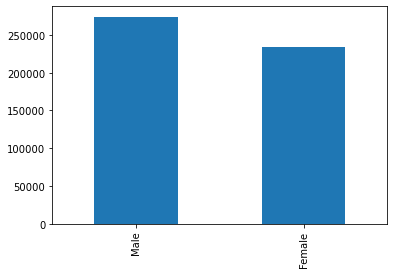

In [11]:
df["Gender"].value_counts().plot(kind="bar")

In [17]:
df["Driving_License"].value_counts()

1    507097
0      1049
Name: Driving_License, dtype: int64

In [18]:
df.groupby("Gender")["Driving_License"].value_counts()

Gender  Driving_License
Female  1                  233542
        0                     279
Male    1                  273555
        0                     770
Name: Driving_License, dtype: int64

In [19]:
df.groupby("Gender")[["Driving_License","Age"]].value_counts().sort_index(ascending = False)

Gender  Driving_License  Age        
Male    1                Young_Adult    110547
                         Old_Age         37110
                         Adult          125898
        0                Young_Adult         4
                         Old_Age           577
                         Adult             189
Female  1                Young_Adult    132044
                         Old_Age         24344
                         Adult           77154
        0                Young_Adult         2
                         Old_Age           220
                         Adult              57
dtype: int64

In [20]:
#confusion matrix
cm = df_train.drop("id", axis=1).corr()
cm

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


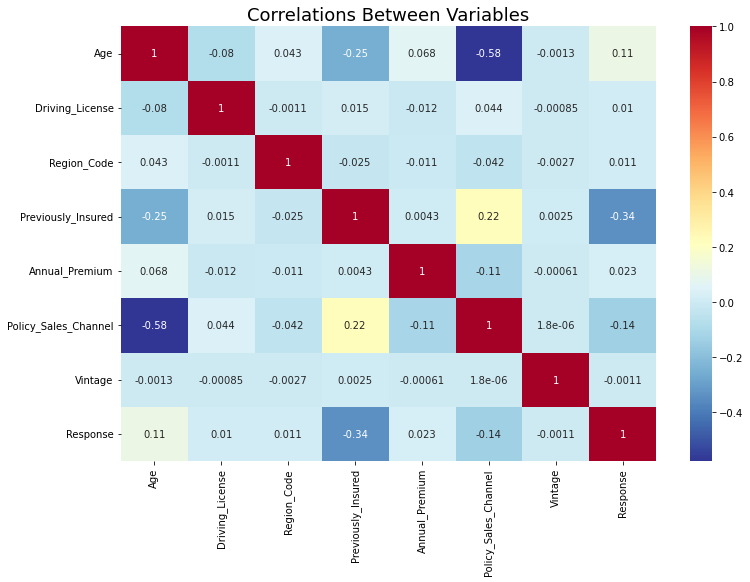

In [22]:
 #correlations between the features
plt.figure(figsize=(12,8))
sns.heatmap(cm,fmt=".2g", cmap="RdYlBu_r", annot=True)
plt.title("Correlations Between Variables", size=18)
plt.show()

# Label Encoding

In [23]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [24]:
df["Vehicle_Age"].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [25]:
df["Vehicle_Damage"].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
Age_list = []
for age in df["Vehicle_Age"]:
    if age == "< 1 Year":
        age = 0
    elif age == "1-2 Year":
        age = 1
    else:
        age = 3
    Age_list.append(age)
print(Age_list)

[3, 1, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 3, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 3, 1, 1, 0, 3, 0, 0, 0, 1, 1, 0, 3, 3, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 1, 0, 3, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 

In [27]:
df["Vehicle_Age"] = Age_list

In [28]:
df["Age"] = df["Age"].map({"Young_Adult":1, "Adult":2, "Old_Age":3})

In [29]:
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df["Vehicle_Damage"] = label_encoder.fit_transform(df["Vehicle_Damage"])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508146 entries, 0 to 127036
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  int32  
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  int64  
 7   Vehicle_Damage        508146 non-null  int32  
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
dtypes: float64(4), int32(2), int64(6)
memory usage: 46.5 MB


In [31]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,2,1,28.0,0,3,1,40454.0,26.0,217,1.0
1,2,1,3,1,3.0,0,1,0,33536.0,26.0,183,0.0
2,3,1,2,1,28.0,0,3,1,38294.0,26.0,27,1.0
3,4,1,1,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,5,0,1,1,41.0,1,0,0,27496.0,152.0,39,0.0


In [32]:
df_train = df.iloc[:381109,:]
df_train.shape

(381109, 12)

In [33]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,2,1,28.0,0,3,1,40454.0,26.0,217,1.0
1,2,1,3,1,3.0,0,1,0,33536.0,26.0,183,0.0
2,3,1,2,1,28.0,0,3,1,38294.0,26.0,27,1.0
3,4,1,1,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,5,0,1,1,41.0,1,0,0,27496.0,152.0,39,0.0


In [71]:
df_test = df.iloc[381109:,:]
df_test.shape

(127037, 12)

In [75]:
df_test.drop("Response", axis=1, inplace=True)

C:\Users\OWNER1\AppData\Local\Temp\ipykernel_5216\3255262935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop("Response", axis=1, inplace=True)


In [76]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,1,1,11.0,1,0,0,35786.0,152.0,53
1,381111,1,2,1,28.0,0,1,1,33762.0,7.0,111
2,381112,1,2,1,28.0,0,1,1,40050.0,124.0,199
3,381113,1,1,1,27.0,1,0,1,37356.0,152.0,187
4,381114,1,1,1,28.0,1,0,0,59097.0,152.0,297


In [36]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'solver': ['lbfgs', 'liblinear', 'saga']
        }
    },
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy']
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=False)
    clf.fit(df_train.drop(["Response"],axis=1), df_train.Response)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=["model","best_score","best_params"])
df

In [37]:
X = df_train.drop(["Response"], axis=1)
y = df_train["Response"]

In [38]:
X.shape

(381109, 11)

In [39]:
y.shape

(381109,)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [41]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
model_dt.score(X_test, y_test)

0.8208784865261998

In [43]:
y_pred = model_dt.predict(X_test)

In [44]:
roc_auc_score(y_test, y_pred)

0.5956783974885065

In [ ]:
model_svm = SVC()
model_svm.fit(X_train,y_train)

In [ ]:
model_svm.score(X_test,y_test)

In [ ]:
y_pred = model_svm.predict(X_test)

In [ ]:
roc_auc_score(y_test, y_pred)

In [45]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
model_rf.score(X_test,y_test)

0.8694733803888641

In [47]:
y_pred = model_rf.predict(X_test)

In [48]:
roc_auc_score(y_test, y_pred)

0.5330125548789213

In [53]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [54]:
model_lr.score(X_test,y_test)

0.8789850699273176

In [55]:
y_pred = model_lr.predict(X_test)

In [56]:
roc_auc_score(y_test, y_pred)

0.5

In [86]:
submission = pd.DataFrame({"id": df_test["id"], "Response": model_dt.predict(df_test)})
submission["Response"]= submission["Response"].astype("int64")
submission.head()

,id,Response
0,381110,0
1,381111,0
2,381112,1
3,381113,0
4,381114,0


In [88]:
submission.to_csv("submission.csv",index=False)